<a href="https://colab.research.google.com/github/Joysd1010/Cse-4102-Research/blob/main/student_success_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [5]:
# import common libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Configure visualization style
sns.set(style='whitegrid', palette='pastel', font_scale=1.1)
plt.rcParams['figure.figsize'] = [10, 6]

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [6]:
# Loading... the dataset:
df = pd.read_csv('/content/StudentsPerformance.csv')

# Display the top five rows of dataset.
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
# Shape
print(df.shape)

(1000, 8)


In [8]:
# data types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None


In [9]:
# BaSic /// STATISTICS \\\
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [10]:
# I usualy like to convert columns in a Snake case (means in lower abc with underscore.)
df.columns = [col.strip().lower().replace(r' ', '_') for col in df.columns]
df.columns = [col.strip().lower().replace(r'/', '_') for col in df.columns]

In [11]:
# Small overview after customizing column names (looking good not!!?)
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


## EDA (Exploratory Data Analysis)

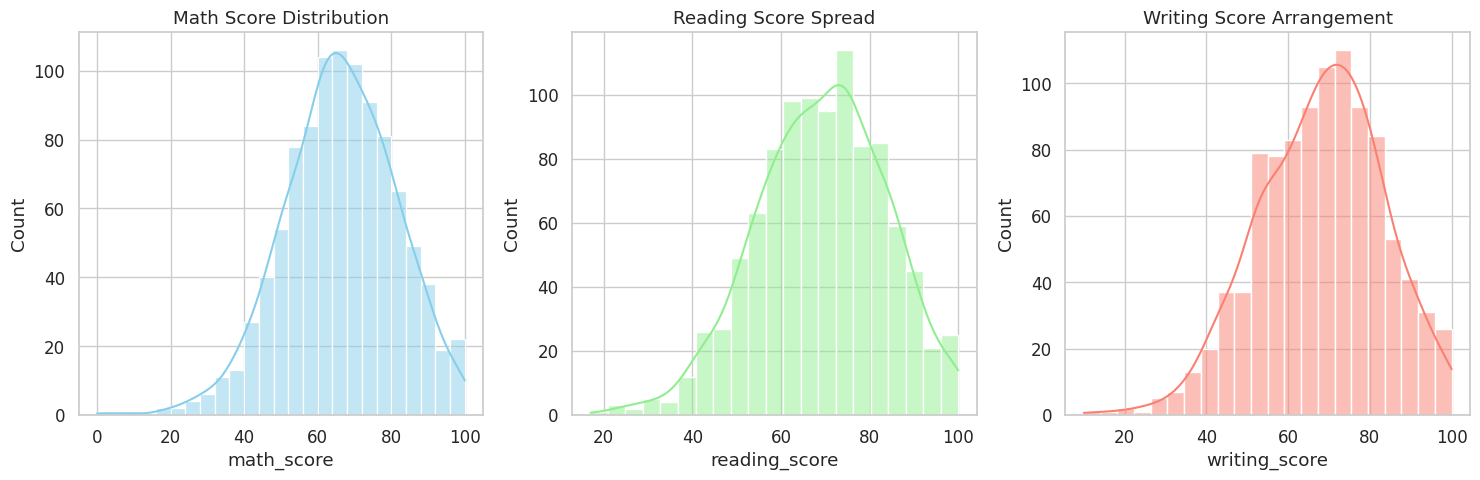

In [12]:
## Score Distributions.
import warnings
warnings.filterwarnings("ignore", message="use_inf_as_na option is deprecated")

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(df['math_score'], kde=True, ax=axes[0], color='skyblue')
sns.histplot(df['reading_score'], kde=True, ax=axes[1], color='lightgreen')
sns.histplot(df['writing_score'], kde=True, ax=axes[2], color='salmon')

axes[0].set_title('Math Score Distribution')
axes[2].set_title('Writing Score Arrangement')
axes[1].set_title('Reading Score Spread')

plt.tight_layout()
plt.show()

In [13]:
## Gender vs Average Scores

score_cols = ['math_score', 'reading_score', 'writing_score']
df_melt = df.melt(id_vars='gender', value_vars=score_cols, var_name='Subject', value_name='Score')

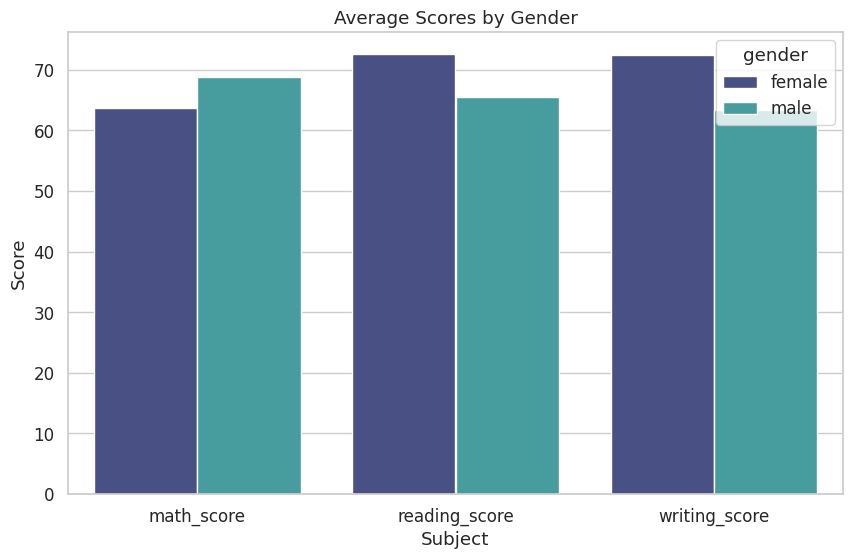

In [14]:
sns.barplot(data=df_melt, x='Subject', y='Score', hue='gender', errorbar=None, palette='mako')
plt.title('Average Scores by Gender')
plt.show()

In [15]:
## Lunch Type vs Performance:

df_melt = df.melt(id_vars='lunch', value_vars=score_cols, var_name='Subject', value_name='Score')

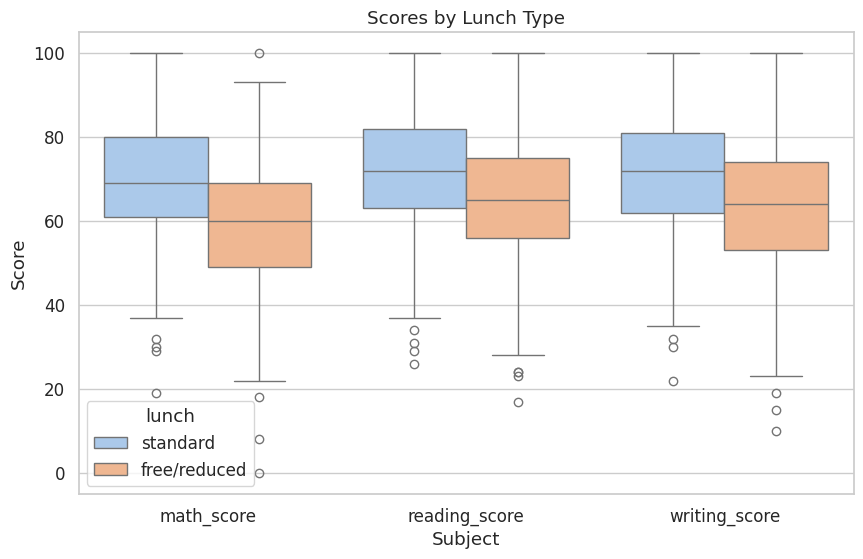

In [16]:
sns.boxplot(data=df_melt, x='Subject', y='Score', hue='lunch')
plt.title('Scores by Lunch Type')
plt.show()

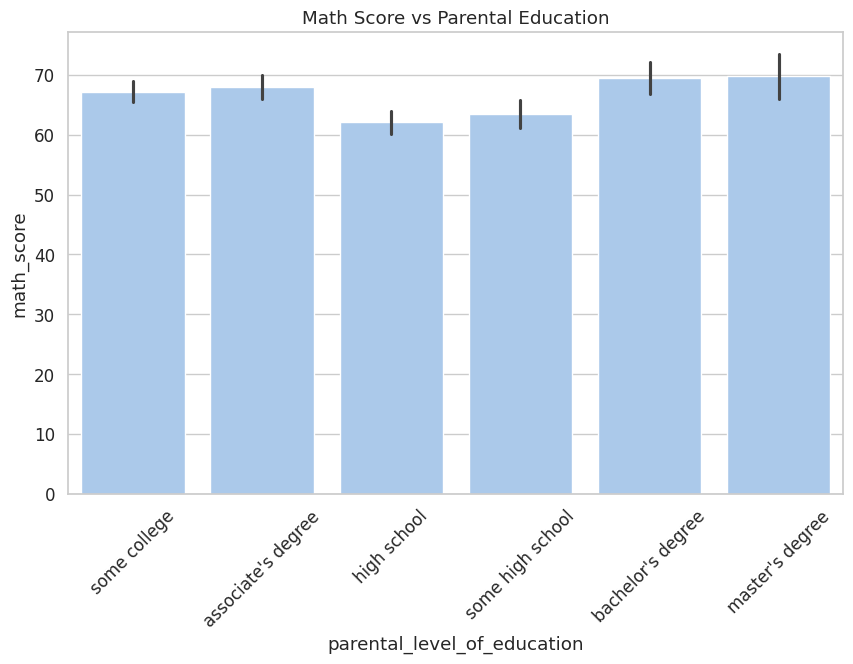

In [17]:
## Parental Education Impact

edu_order = df['parental_level_of_education'].value_counts().index
sns.barplot(data=df, x='parental_level_of_education', y='math_score', order=edu_order)
plt.xticks(rotation=45)
plt.title("Math Score vs Parental Education")
plt.show()

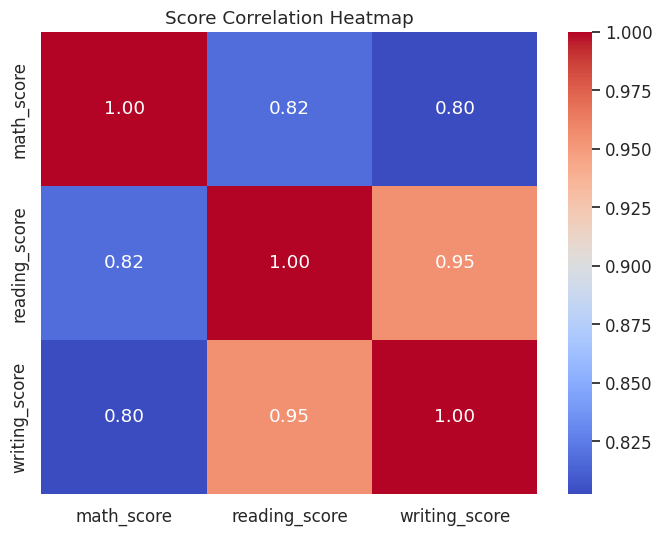

In [18]:
## Correlation Heatmap

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Score Correlation Heatmap')
plt.show()

## Basic Feature Engineering

##### ((  Art of creating new features from existing features ))

In [19]:
## I'll add average score column ...
df['average_score'] = df[['math_score', 'reading_score', 'writing_score']].mean(axis=1).astype(int)

# Let's see the results !
df[['math_score', 'reading_score', 'writing_score', 'average_score']].sample(6)

,math_score,reading_score,writing_score,average_score
39,57,56,57,56
453,65,58,49,57
211,35,28,27,30
385,67,76,75,72
525,68,60,59,62
664,80,63,63,68


In [20]:
## OH Yess!! Now we can also easliy create a category column (eg: performance_level)
df['performance_level'] = pd.cut(df['average_score'],
       bins=[0, 60, 70, 80, 90, 100],
       labels=['Poor', 'Fair', 'Good', 'Very Good', 'Excellent'])

In [21]:
## Now, let see, is this working...
df[['average_score', 'performance_level']].tail(4) # to see last 4 rows

,average_score,performance_level
996,57,Poor
997,65,Fair
998,74,Good
999,83,Very Good


## Machine Learning Models (Scikit-learn)

####  Encoding Categorical Features

After cleaning, preprocessing, and feature engineering, we usually encode categorical features, means we convert categorical columns into numbers (labels). We perform encoding because, machine learning models cann't handle categorical data. The are more than 1 ways to encode, like: One-Hot Encoding, simple mapping, ordinal Encoding etc.
I often use Label Encoding on all columns. So Let's crush thesseeeee....

In [22]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_columns = ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']
for col in df_columns:
    df[col] = le.fit_transform(df[col])

In [23]:
df.head()
## Alright !! We just did that ***

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,average_score,performance_level
0,0,1,1,1,1,72,72,74,72,Good
1,0,2,4,1,0,69,90,88,82,Very Good
2,0,1,3,1,1,90,95,93,92,Excellent
3,1,0,0,0,1,47,57,44,49,Poor
4,1,2,4,1,1,76,78,75,76,Good


## Now, it's time to split data in feaures (X) and target (Y)

In [24]:
from sklearn.model_selection import train_test_split

x = df.drop(['average_score', 'performance_level'], axis=1)
y = df['average_score']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=111)

## Linear Regression

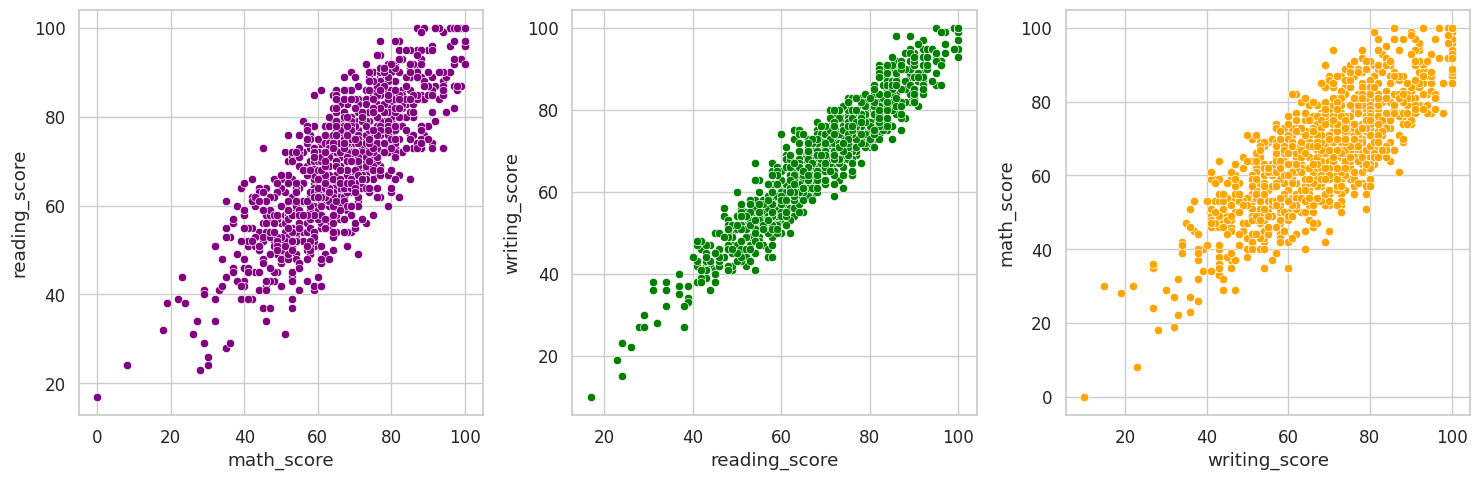

In [25]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.scatterplot(data=df, x='math_score', y ='reading_score', ax=axes[0], color='purple')
sns.scatterplot(data=df, x='reading_score', y='writing_score', ax=axes[1], color='green')
sns.scatterplot(data=df, x='writing_score', y='math_score', ax=axes[2], color='orange')
plt.tight_layout()

## ---->  Why Linear Regression !??

So the most simple and first Machine learning Model that you usually learn while learning AI/ML, the 99% chances are that it will will be linear Regression. But remember!! it will only better perform on the data that is linear, as like ours. From above scatterplots, you can clearly see that our data is linearly organized, because when the value of one varible increases, another's value automatically increase. The columns like 'reading_score', 'writing_score', and 'math_score', are highly correlated.
So let's create our basic model.

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Create model
model1 = LinearRegression()

# fit/train model with x_train and y_train
model1.fit(x_train, y_train)

# Now predict x_test
y_predic = model1.predict(x_test)

### Evaluation of Model1 (linear regression)

In [27]:
# Look! that how well our linear model is performing.
print('R2:  ', r2_score(y_test, y_predic))
print('MAE: ', mean_absolute_error(y_test, y_predic))
print('MSE: ', mean_squared_error(y_test, y_predic))

R2:   0.9996550085326572
MAE:  0.2085519838721334
MSE:  0.06770801675592035


# OH my God!! our model got really HIGH Accuracy and **R2 Score**